# NLP and Data Extraction Challenge
## Data Science and Machine Learning

Internship Brazil Labs - 2024

> The idea of this test is to understand your way of thinking, coding, and problem-solving skills. There is no right answer, just follow your instincts and share with us the solutions of the challenges below.

# 1) Exploratory Data Analysis (EDA) and Visualization

>EDA is a set of process of examining, cleaning, and transforming data to uncover patterns, spot anomalies, test hypotheses, or check assumptions.


>Data visualization is the act of taking information (data) and placing it into a visual context, such as a map or graph. Data visualizations make big and small data easier for the human brain to understand, and visualization also makes it easier to detect patterns, trends, and outliers in groups of data.

The **first challenge** is: explore information from **dataset.csv** file.
<br>
You can choose your preferred techniques or tools, be aware that sometimes less is more, present meaningful insights, and show us what you have found interesting on this dataset!

### Solution

### Importing the necessary libraries

We will use the following libraries to perform the EDA and visualization:

- pandas: to load the dataset and manipulate the data.
- numpy: to perform mathematical operations.
- matplotlib: to create visualizations.
- regex: to work with regex.

And the following for the AI/ML step:

- sklearn: to perform the machine learning model.
- mlxtend: to perform the machine learning model.


To install the libraries, use the pip command:

``pip install *library_name*``

After that, run the python cell below to import the libraries.

In [71]:
import random
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


#### Loading the Dataset

First of all, we need to read the dataset and take a look at the first rows to understand the data structure.


In [72]:
dados = pd.read_csv('resume_dataset.csv', delimiter=',', encoding='utf-8')

dados.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


### Scrapping the Skills from the Resumes

With the dataset loaded, we need to scrap the skills from the resumes. The function below will be used for that purpose. The way it works is:

- It will receive a resume as input.
- It will use regex to find the skills in the resume.*
- It will return a list with the skills found in the resume.

*how the regex works is detailed in the rationale explanation in the last cell of this step


In [73]:
def extractSkills(text):
    skills = {}
    text = text.lower()
    
    # regex to match the skills and experience
    reg = r'(?<=\n|^)(?!skill details\s*\n)([^\n-]+)-\s*exprience\s*-\s*(less than \d+ year|\d+)\s*months?'
    matches = re.findall(reg, text)

    # iterate over the matches and extract the skills and experience
    for match in matches:
        
        habilidades_str, experiencia = match

        # treatment for when experience is less than a year
        experiencia = random.uniform(1,11) if experiencia.startswith('less than') else int(experiencia)

        # treatment for when skills are separated by comma 
        if ',' in habilidades_str:
            habilidades = [habilidade.strip() for habilidade in habilidades_str.split(',')]

        else:
            habilidades = [habilidades_str.strip()]

        for habilidade in habilidades:
            skills[habilidade] = experiencia

    return skills


Using the function, we will create a dataframe containing all the skills found in the resumes and the respective level of experience in each. This dataframe will be used to perform the EDA and visualization.

In [74]:
data_hab = []

# iterates over the rows of the dataframe and extract the skills 
for index, row in dados.iterrows():
    text = row['Resume']

    if 'skill details' in text.lower():
        habilidades = extractSkills(text)

        data_hab.append({'skills': habilidades})



df = pd.DataFrame([(skill, exp) for d in data_hab for skill, exp in d['skills'].items()], columns=['Skill', 'Level (months)'])

df

,Skill,Level (months)
0,javascript,24.000000
1,jquery,24.000000
2,python,24.000000
3,python,5.759302
4,statsmodels,12.000000
...,...,...
4115,testing,24.000000
4116,windows xp,24.000000
4117,css,6.000000
4118,database,6.000000


### Identifying the Most Common Skills

The first data analysis will be to identify the most common skills in the dataset. We will use the *value_counts()* method to do that.

Then, we sort the skills by the number of occurrences and plot the top 10 skills in a bar chart using matplotlib. 

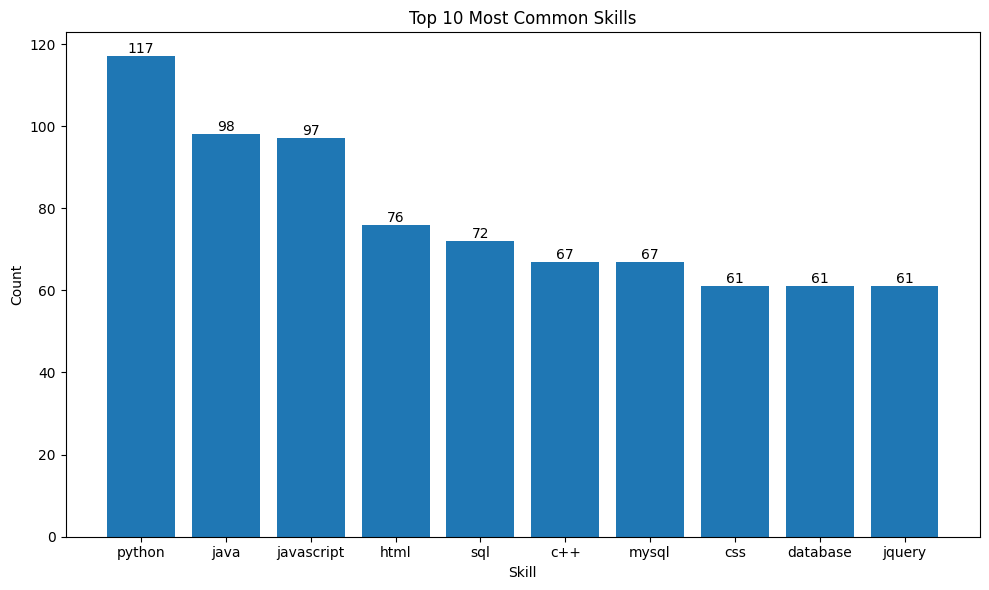

In [75]:
# count the number of occurrences of each skill
skill_counts = df['Skill'].value_counts()

# sort the skills by the number of occurrences
sorted_skills = skill_counts.sort_values(ascending=False)

top_skills = sorted_skills.head(10)

top_skill_names = top_skills.index.tolist()
top_skill_counts = top_skills.values

plt.figure(figsize=(10, 6))
bars = plt.bar(top_skill_names, top_skill_counts)

for bar, count in zip(bars, top_skill_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
             ha='center', va='bottom')

plt.xlabel('Skill')
plt.ylabel('Count')
plt.title('Top 10 Most Common Skills')

plt.tight_layout()
plt.show()

### Identifying the Most Experienced Skills

We will also identify the most experienced skills in the dataset. We will use the *groupby()* method to group the skills by the experience level and then calculate the mean experience level for each skill.

Then, we sort the skills by the mean experience level and plot the top 10 skills in a bar chart using matplotlib.

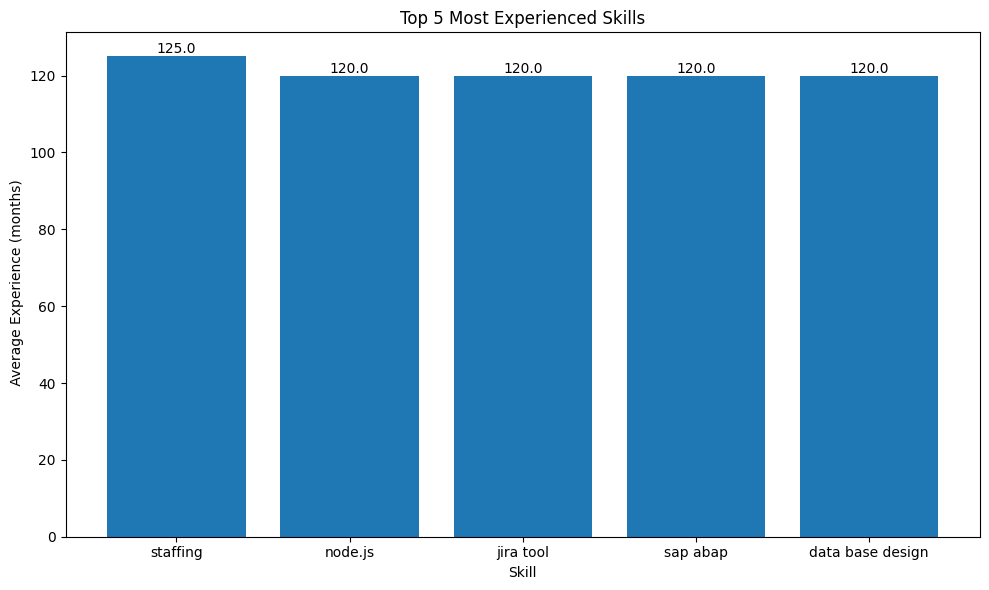

In [76]:
average_experience_by_skill = np.floor(df.groupby('Skill')['Level (months)'].mean())

sorted_experience = average_experience_by_skill.sort_values(ascending=False)

top_skills = sorted_experience.head(5)
top_skill_names = top_skills.index.tolist()
top_skill_counts = top_skills.values

plt.figure(figsize=(10, 6))

bars = plt.bar(top_skill_names, top_skill_counts)
for bar, count in zip(bars, top_skill_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
             ha='center', va='bottom')
    
plt.xlabel('Skill')
plt.ylabel(' Average Experience (months)')
plt.title('Top 5 Most Experienced Skills')

plt.tight_layout()
plt.show()


### Explain the rationale of your decision about techniques and visualizations

### Understanding the dataset

Firstly, I read the dataset to understand the data and the problem. I've realized that a pattern emerged from the resumes: the Skill Details from each candidate. So, I decided to extract the skills and experience time from each candidate, to analyze the dataset and find usefull insights.

### Extracting the Skills

The way that the CSV file is organized, there's a column called "Category", and the whole resume is inside a "Resume" column. So, the real challenge was to scrap the data from inside the resume value.
My approach was to use a Regex to find the skills and experience time from each candidate. I've used the following Regex:

```(?<=\n|^)(?!skill details\s*\n)([^\n-]+)-\s*exprience\s*-\s*(less than \d+ year|\d+)\s*months?```

This Regex will find the skills and experience time from each candidate. The Regex is divided in 3 parts:

1. ```(?<=\n|^)``` - This part will find the start of the resume, or the start of a new line. 

2. ```(?!skill details\s*\n)``` - This part makes sure that the Regex will not find the "Skill Details" line, because it's not a skill.

3. ```([^\n-]+)-\s*exprience\s*-\s*(less than \d+ year|\d+)\s*months?``` - This detects the pattern of a skill and experience time. The first part ```([^\n-]+)``` will find the skill name, and the second part ```-\s*exprience\s*-\s*(less than \d+ year|\d+)\s*months?``` will find the experience time. The experience time can be "less than X year" or "X months".


When the regex finds a match, there's a condition to check if the skills are in a single line, separeted by commas. If that's the case, the skills are separeted by commas and the experience time is the same for all skills. 

Also, there's a treatment to when the experience is described as "less than 1 year". When that's the case, the experience time is set to a random number between 1 and 11.

### Data Visualization and Analysis

After extracting the skills and experience time, I wanted to understand what are the most common skills, and the skills with the most experience time. 

To do that, I've sorted the skills by count; and the skills by experience time. Then, I've plotted the top 10 skills by count and the top 5 skills by experience time in a bar chart using the *matplotlib* library.

Analysing the most common skills, we can see that Python leads the chart, followed by Java and Javascript. What that insight shows us is that the most common skills are programming languages commonly related to data activities, which is expected, since the dataset is formed manly by data professionals.

Analysing the most experienced skills, we can see that the top 5 skills are related to team management, such as staffing, agile methodoly and jira. My interpretation is that the most experienced professionals are more related to team management and leadership, which is also expected, since the dataset is formed mainly by professionals with more than 5 years of experience.



# 2) NLP techniques / Machine Learning approach

The **second challenge** is: explore dataset information and apply NLP techniques or Machine Learning models to extract even more usefull information from data. Feel free to explore different machine learning models (e.g classification, clustering, etc) and make sure to explain the model results for each task you apply these ML models.
<br><br>
You can choose your preferred techniques or tools, be aware that sometimes less is more, present meaningful insights, and show us what you have found interesting on those files! (i.e: topic modeling, word distributions, etc)

### Language Association Analysis

As a challenge, I decided to perform a language association analysis. The idea is to understand the relationship between the skills cited in the resumes. That is, what skills are related to eachother and tend to appear together.

To do that, firstly I've made some changes in the *extractSkills* method to extract all skills for each resume, instead of all skills in all resumes.


In [77]:
def extractSkillsOnly(text):
    skills = set()
    text = text.lower()
    
    reg = r'(?<=\n|^)(?!skill details\s*\n)([^\n-]+)-\s*exprience'
    matches = re.findall(reg, text)

    for match in matches:
        habilidades_str = match.strip()

        if ',' in habilidades_str:
            habilidades = [habilidade.strip() for habilidade in habilidades_str.split(',')]
        else:
            habilidades = [habilidades_str.strip()]

        for habilidade in habilidades:
            skills.add(habilidade)

    return list(skills)


In [78]:

skills = []
for index, row in dados.iterrows():
    text = row['Resume']
    
    if 'skill details' in text.lower():
        scraped_skills = extractSkillsOnly(text)

        skills.append(scraped_skills)


skills_df = pd.DataFrame({'Skills': skills})

skills_df

,Skills
0,"[jquery, python, javascript]"
1,"[statsmodels, scipy, python, machine learning,..."
2,"[sql, mathematics, python, machine learning, d..."
3,"[sql, linear programming, python, r, machine l..."
4,"[c, python, data analysis, core java, data str..."
...,...
957,"[word, excel, ms office]"
958,[]
959,[]
960,"[pcb, pcb design, matlab]"


### KMeans Clustering

As a first approach, I used the *KMeans* algorithm to cluster the skills in 5 clusters. Then, I've plotted the clusters in a 2D chart using the *matplotlib* library.

Silhouette Score: 0.17383208246885007


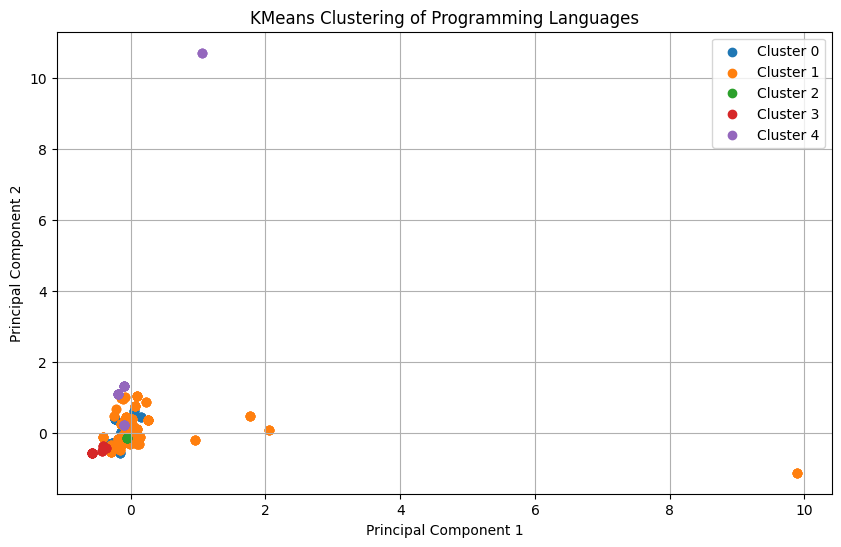

In [79]:
skills_df['Skills'] = skills_df['Skills'].apply(lambda x: ' '.join(x)) 

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(skills_df['Skills'])

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans.fit(X)

skills_df['Cluster'] = kmeans.labels_

silhouette_avg = silhouette_score(X, kmeans.labels_)

print("Silhouette Score:", silhouette_avg)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())


plt.figure(figsize=(10, 6))
for cluster_num in range(num_clusters):
    plt.scatter(X_pca[skills_df['Cluster'] == cluster_num, 0],
                X_pca[skills_df['Cluster'] == cluster_num, 1],
                label=f'Cluster {cluster_num}')

plt.title('KMeans Clustering of Programming Languages')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


We can see from this analysis that the languages have similar characteristics, and are grouped together. The same happens with the data tools, and the management tools. This analysis shows that the skills are related to eachother and tend to appear together, which is a good insight to understand the relationship between the skills cited in the resumes.

### Explain the rationale of your NLP techniques/ML models usage and conclusions

# 3) Presentation

The **third** and last exercise is: present your findings to us, challenges of this exercise and how you handled them, and any other important information you will like to share with us.
<br><br>
We will be evaluating your Python code, how you organize your toughts and explanations during the presentation, and other aspects we see as important for a good presentation. You don't need to generate any output for this third task. 

Good luck! :)